In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
from scipy import stats
from scipy.stats import norm, skew
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn import svm



    


In [2]:
train_df =  pd.read_excel('/Users/b.sanjeev/Downloads/snehanshuwork-master/Data_Train.xlsx')
test_df=pd.read_excel('/Users/b.sanjeev/Desktop/test2.xlsx')


In [3]:
train_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
test_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,12/03/2019,Chennai,Kolkata,MAA → CCU,13:20,15:35,2h 15m,non-stop,No info,6297
1,Jet Airways,1/06/2019,Mumbai,Hyderabad,BOM → HYD,07:05,08:30,1h 25m,non-stop,No info,5678
2,Jet Airways,09/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,08:15 13 Mar,26h 30m,1 stop,In-flight meal not included,9134
3,Multiple carriers,24/06/2019,Delhi,Cochin,DEL → BOM → COK,11:40,19:00,7h 20m,1 stop,In-flight meal not included,10791
4,Jet Airways,24/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 25 Jun,13h 30m,2 stops,No info,12819
...,...,...,...,...,...,...,...,...,...,...,...
237,Jet Airways,15/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,15:15,7h 15m,1 stop,In-flight meal not included,9134
238,Air India,6/06/2019,Delhi,Cochin,DEL → HYD → MAA → COK,13:15,09:25 07 Jun,20h 10m,2 stops,No info,10939
239,Air India,6/06/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,07:40 07 Jun,20h 45m,2 stops,No info,11753
240,SpiceJet,24/04/2019,Kolkata,Banglore,CCU → BLR,17:10,19:40,2h 30m,non-stop,No info,4174


In [5]:
big_df = train_df.append(test_df,sort=True)


In [6]:
big_df.dtypes

Additional_Info    object
Airline            object
Arrival_Time       object
Date_of_Journey    object
Dep_Time           object
Destination        object
Duration           object
Price               int64
Route              object
Source             object
Total_Stops        object
dtype: object

In [7]:
big_df.head(20)

,Additional_Info,Airline,Arrival_Time,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops
0,No info,IndiGo,01:10 22 Mar,24/03/2019,22:20,New Delhi,2h 50m,3897,BLR → DEL,Banglore,non-stop
1,No info,Air India,13:15,1/05/2019,05:50,Banglore,7h 25m,7662,CCU → IXR → BBI → BLR,Kolkata,2 stops
2,No info,Jet Airways,04:25 10 Jun,9/06/2019,09:25,Cochin,19h,13882,DEL → LKO → BOM → COK,Delhi,2 stops
3,No info,IndiGo,23:30,12/05/2019,18:05,Banglore,5h 25m,6218,CCU → NAG → BLR,Kolkata,1 stop
4,No info,IndiGo,21:35,01/03/2019,16:50,New Delhi,4h 45m,13302,BLR → NAG → DEL,Banglore,1 stop
5,No info,SpiceJet,11:25,24/06/2019,09:00,Banglore,2h 25m,3873,CCU → BLR,Kolkata,non-stop
6,In-flight meal not included,Jet Airways,10:25 13 Mar,12/03/2019,18:55,New Delhi,15h 30m,11087,BLR → BOM → DEL,Banglore,1 stop
7,No info,Jet Airways,05:05 02 Mar,01/03/2019,08:00,New Delhi,21h 5m,22270,BLR → BOM → DEL,Banglore,1 stop
8,In-flight meal not included,Jet Airways,10:25 13 Mar,12/03/2019,08:55,New Delhi,25h 30m,11087,BLR → BOM → DEL,Banglore,1 stop
9,No info,Multiple carriers,19:15,27/05/2019,11:25,Cochin,7h 50m,8625,DEL → BOM → COK,Delhi,1 stop


In [8]:
big_df['Date'] = big_df['Date_of_Journey'].str.split('/').str[0]
big_df['Month'] = big_df['Date_of_Journey'].str.split('/').str[1]
big_df['Year'] = big_df['Date_of_Journey'].str.split('/').str[2]


In [9]:
big_df.head(20)

,Additional_Info,Airline,Arrival_Time,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops,Date,Month,Year
0,No info,IndiGo,01:10 22 Mar,24/03/2019,22:20,New Delhi,2h 50m,3897,BLR → DEL,Banglore,non-stop,24,03,2019
1,No info,Air India,13:15,1/05/2019,05:50,Banglore,7h 25m,7662,CCU → IXR → BBI → BLR,Kolkata,2 stops,1,05,2019
2,No info,Jet Airways,04:25 10 Jun,9/06/2019,09:25,Cochin,19h,13882,DEL → LKO → BOM → COK,Delhi,2 stops,9,06,2019
3,No info,IndiGo,23:30,12/05/2019,18:05,Banglore,5h 25m,6218,CCU → NAG → BLR,Kolkata,1 stop,12,05,2019
4,No info,IndiGo,21:35,01/03/2019,16:50,New Delhi,4h 45m,13302,BLR → NAG → DEL,Banglore,1 stop,01,03,2019
5,No info,SpiceJet,11:25,24/06/2019,09:00,Banglore,2h 25m,3873,CCU → BLR,Kolkata,non-stop,24,06,2019
6,In-flight meal not included,Jet Airways,10:25 13 Mar,12/03/2019,18:55,New Delhi,15h 30m,11087,BLR → BOM → DEL,Banglore,1 stop,12,03,2019
7,No info,Jet Airways,05:05 02 Mar,01/03/2019,08:00,New Delhi,21h 5m,22270,BLR → BOM → DEL,Banglore,1 stop,01,03,2019
8,In-flight meal not included,Jet Airways,10:25 13 Mar,12/03/2019,08:55,New Delhi,25h 30m,11087,BLR → BOM → DEL,Banglore,1 stop,12,03,2019
9,No info,Multiple carriers,19:15,27/05/2019,11:25,Cochin,7h 50m,8625,DEL → BOM → COK,Delhi,1 stop,27,05,2019


In [10]:
big_df['Date'] = big_df['Date'].astype(int)
big_df['Month'] = big_df['Month'].astype(int)
big_df['Year'] = big_df['Year'].astype(int)


In [11]:
big_df.head(20)

,Additional_Info,Airline,Arrival_Time,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops,Date,Month,Year
0,No info,IndiGo,01:10 22 Mar,24/03/2019,22:20,New Delhi,2h 50m,3897,BLR → DEL,Banglore,non-stop,24,3,2019
1,No info,Air India,13:15,1/05/2019,05:50,Banglore,7h 25m,7662,CCU → IXR → BBI → BLR,Kolkata,2 stops,1,5,2019
2,No info,Jet Airways,04:25 10 Jun,9/06/2019,09:25,Cochin,19h,13882,DEL → LKO → BOM → COK,Delhi,2 stops,9,6,2019
3,No info,IndiGo,23:30,12/05/2019,18:05,Banglore,5h 25m,6218,CCU → NAG → BLR,Kolkata,1 stop,12,5,2019
4,No info,IndiGo,21:35,01/03/2019,16:50,New Delhi,4h 45m,13302,BLR → NAG → DEL,Banglore,1 stop,1,3,2019
5,No info,SpiceJet,11:25,24/06/2019,09:00,Banglore,2h 25m,3873,CCU → BLR,Kolkata,non-stop,24,6,2019
6,In-flight meal not included,Jet Airways,10:25 13 Mar,12/03/2019,18:55,New Delhi,15h 30m,11087,BLR → BOM → DEL,Banglore,1 stop,12,3,2019
7,No info,Jet Airways,05:05 02 Mar,01/03/2019,08:00,New Delhi,21h 5m,22270,BLR → BOM → DEL,Banglore,1 stop,1,3,2019
8,In-flight meal not included,Jet Airways,10:25 13 Mar,12/03/2019,08:55,New Delhi,25h 30m,11087,BLR → BOM → DEL,Banglore,1 stop,12,3,2019
9,No info,Multiple carriers,19:15,27/05/2019,11:25,Cochin,7h 50m,8625,DEL → BOM → COK,Delhi,1 stop,27,5,2019


In [12]:
big_df=big_df.drop(['Date_of_Journey'], axis=1)


In [13]:
big_df['Arrival_Time'] = big_df['Arrival_Time'] .str.split(' ').str[0]


In [14]:
big_df['Total_Stops']=big_df['Total_Stops'].fillna('1 stop')


In [15]:
big_df.head(20)

,Additional_Info,Airline,Arrival_Time,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops,Date,Month,Year
0,No info,IndiGo,01:10,22:20,New Delhi,2h 50m,3897,BLR → DEL,Banglore,non-stop,24,3,2019
1,No info,Air India,13:15,05:50,Banglore,7h 25m,7662,CCU → IXR → BBI → BLR,Kolkata,2 stops,1,5,2019
2,No info,Jet Airways,04:25,09:25,Cochin,19h,13882,DEL → LKO → BOM → COK,Delhi,2 stops,9,6,2019
3,No info,IndiGo,23:30,18:05,Banglore,5h 25m,6218,CCU → NAG → BLR,Kolkata,1 stop,12,5,2019
4,No info,IndiGo,21:35,16:50,New Delhi,4h 45m,13302,BLR → NAG → DEL,Banglore,1 stop,1,3,2019
5,No info,SpiceJet,11:25,09:00,Banglore,2h 25m,3873,CCU → BLR,Kolkata,non-stop,24,6,2019
6,In-flight meal not included,Jet Airways,10:25,18:55,New Delhi,15h 30m,11087,BLR → BOM → DEL,Banglore,1 stop,12,3,2019
7,No info,Jet Airways,05:05,08:00,New Delhi,21h 5m,22270,BLR → BOM → DEL,Banglore,1 stop,1,3,2019
8,In-flight meal not included,Jet Airways,10:25,08:55,New Delhi,25h 30m,11087,BLR → BOM → DEL,Banglore,1 stop,12,3,2019
9,No info,Multiple carriers,19:15,11:25,Cochin,7h 50m,8625,DEL → BOM → COK,Delhi,1 stop,27,5,2019


In [16]:
big_df['Total_Stops']=big_df['Total_Stops'].replace('non-stop','0 stop')


# In[89]:


big_df['Stop'] = big_df['Total_Stops'].str.split(' ').str[0]


# In[90]:


big_df['Stop'] = big_df['Stop'].astype(int)


# In[91]:


big_df=big_df.drop(['Total_Stops'], axis=1)


# In[92]:


big_df['Arrival_Hour'] = big_df['Arrival_Time'] .str.split(':').str[0]
big_df['Arrival_Minute'] = big_df['Arrival_Time'] .str.split(':').str[1]

big_df['Arrival_Hour'] = big_df['Arrival_Hour'].astype(int)
big_df['Arrival_Minute'] = big_df['Arrival_Minute'].astype(int)
big_df=big_df.drop(['Arrival_Time'], axis=1)


# In[93]:


big_df['Dep_Hour'] = big_df['Dep_Time'] .str.split(':').str[0]
big_df['Dep_Minute'] = big_df['Dep_Time'] .str.split(':').str[1]
big_df['Dep_Hour'] = big_df['Dep_Hour'].astype(int)
big_df['Dep_Minute'] = big_df['Dep_Minute'].astype(int)
big_df=big_df.drop(['Dep_Time'], axis=1)


# In[94]:


big_df['Route_1'] = big_df['Route'] .str.split('→ ').str[0]
big_df['Route_2'] = big_df['Route'] .str.split('→ ').str[1]
big_df['Route_3'] = big_df['Route'] .str.split('→ ').str[2]
big_df['Route_4'] = big_df['Route'] .str.split('→ ').str[3]
big_df['Route_5'] = big_df['Route'] .str.split('→ ').str[4]


# In[95]:


big_df['Price'].fillna((big_df['Price'].mean()), inplace=True)


# In[96]:


big_df['Route_1'].fillna("None",inplace = True)
big_df['Route_2'].fillna("None",inplace = True)
big_df['Route_3'].fillna("None",inplace = True)
big_df['Route_4'].fillna("None",inplace = True)
big_df['Route_5'].fillna("None",inplace = True)


# In[97]:


big_df.describe()


# In[98]:


big_df=big_df.drop(['Route'], axis=1)
big_df=big_df.drop(['Duration'], axis=1)

In [17]:
big_df.head()

,Additional_Info,Airline,Destination,Price,Source,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,No info,IndiGo,New Delhi,3897,Banglore,24,3,2019,0,1,10,22,20,BLR,DEL,None,None,None
1,No info,Air India,Banglore,7662,Kolkata,1,5,2019,2,13,15,5,50,CCU,IXR,BBI,BLR,None
2,No info,Jet Airways,Cochin,13882,Delhi,9,6,2019,2,4,25,9,25,DEL,LKO,BOM,COK,None
3,No info,IndiGo,Banglore,6218,Kolkata,12,5,2019,1,23,30,18,5,CCU,NAG,BLR,None,None
4,No info,IndiGo,New Delhi,13302,Banglore,1,3,2019,1,21,35,16,50,BLR,NAG,DEL,None,None


In [18]:
from sklearn.preprocessing import LabelEncoder

lb_encode = LabelEncoder()
big_df["Additional_Info"] = lb_encode.fit_transform(big_df["Additional_Info"])
big_df["Airline"] = lb_encode.fit_transform(big_df["Airline"])
big_df["Destination"] = lb_encode.fit_transform(big_df["Destination"])
big_df["Source"] = lb_encode.fit_transform(big_df["Source"])
big_df['Route_1']= lb_encode.fit_transform(big_df["Route_1"])
big_df['Route_2']= lb_encode.fit_transform(big_df["Route_2"])
big_df['Route_3']= lb_encode.fit_transform(big_df["Route_3"])
big_df['Route_4']= lb_encode.fit_transform(big_df["Route_4"])
big_df['Route_5']= lb_encode.fit_transform(big_df["Route_5"])



In [19]:
big_df.to_excel('codingdf.xlsx')



In [20]:
big_df.tail(1500)

,Additional_Info,Airline,Destination,Price,Source,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
9425,5,6,1,9930,2,21,5,2019,1,21,0,7,5,3,7,6,12,4
9426,8,6,1,18286,2,3,3,2019,1,1,35,11,30,3,7,6,12,4
9427,5,4,2,7229,0,27,6,2019,0,22,50,19,50,0,13,24,12,4
9428,8,10,1,6216,2,24,6,2019,0,9,10,6,0,3,10,24,12,4
9429,8,0,2,4282,0,6,6,2019,0,7,45,4,55,0,13,24,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,5,4,5,9134,0,15,3,2019,1,15,15,8,0,0,7,8,12,4
238,8,1,1,10939,2,6,6,2019,2,9,25,13,15,3,20,22,5,4
239,8,1,1,11753,2,6,6,2019,2,7,40,10,55,3,16,4,5,4
240,8,8,0,4174,3,24,4,2019,0,19,40,17,10,2,5,24,12,4


In [21]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=True).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns  


# In[101]:


missing_values_table(big_df)


Your selected dataframe has 18 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [22]:
big_df

,Additional_Info,Airline,Destination,Price,Source,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,8,3,5,3897,0,24,3,2019,0,1,10,22,20,0,13,24,12,4
1,8,1,0,7662,3,1,5,2019,2,13,15,5,50,2,25,1,3,4
2,8,4,1,13882,2,9,6,2019,2,4,25,9,25,3,32,4,5,4
3,8,3,0,6218,3,12,5,2019,1,23,30,18,5,2,34,3,12,4
4,8,3,5,13302,0,1,3,2019,1,21,35,16,50,0,34,8,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,5,4,5,9134,0,15,3,2019,1,15,15,8,0,0,7,8,12,4
238,8,1,1,10939,2,6,6,2019,2,9,25,13,15,3,20,22,5,4
239,8,1,1,11753,2,6,6,2019,2,7,40,10,55,3,16,4,5,4
240,8,8,0,4174,3,24,4,2019,0,19,40,17,10,2,5,24,12,4


In [23]:
df_train = big_df[0:10683]
df_test = big_df[10683:]
df_test = df_test.drop(['Price'], axis =1)


# In[103]:


X = df_train.drop(['Price'], axis=1)
y = df_train.Price


# In[104]:


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)



In [24]:
df_train

,Additional_Info,Airline,Destination,Price,Source,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,8,3,5,3897,0,24,3,2019,0,1,10,22,20,0,13,24,12,4
1,8,1,0,7662,3,1,5,2019,2,13,15,5,50,2,25,1,3,4
2,8,4,1,13882,2,9,6,2019,2,4,25,9,25,3,32,4,5,4
3,8,3,0,6218,3,12,5,2019,1,23,30,18,5,2,34,3,12,4
4,8,3,5,13302,0,1,3,2019,1,21,35,16,50,0,34,8,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,8,0,0,4107,3,9,4,2019,0,22,25,19,55,2,5,24,12,4
10679,8,1,0,4145,3,27,4,2019,0,23,20,20,45,2,5,24,12,4
10680,8,4,2,7229,0,27,4,2019,0,11,20,8,20,0,13,24,12,4
10681,8,10,5,12648,0,1,3,2019,0,14,10,11,30,0,13,24,12,4


In [25]:
df_test

,Additional_Info,Airline,Destination,Source,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,8,3,4,1,12,3,2019,0,15,35,13,20,4,8,24,12,4
1,8,4,3,4,1,6,2019,0,8,30,7,5,1,19,24,12,4
2,5,4,5,0,9,3,2019,1,8,15,5,45,0,7,8,12,4
3,5,6,1,2,24,6,2019,1,19,0,11,40,3,7,6,12,4
4,8,4,1,2,24,6,2019,2,12,35,23,5,3,0,4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,5,4,5,0,15,3,2019,1,15,15,8,0,0,7,8,12,4
238,8,1,1,2,6,6,2019,2,9,25,13,15,3,20,22,5,4
239,8,1,1,2,6,6,2019,2,7,40,10,55,3,16,4,5,4
240,8,8,0,3,24,4,2019,0,19,40,17,10,2,5,24,12,4


In [26]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url = "http://i.imgur.com/QBuDOjs.jpg")


# # LINEAR REGRESSION

# In[55]:


#Build our model method
lm = LinearRegression()


# In[119]:


#Build our cross validation method
kfolds = KFold(n_splits=50,shuffle=True, random_state=100)


# In[120]:


def cv_rmse(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, 
                                   scoring="neg_mean_squared_error", 
                                   cv = kfolds))
    return(rmse)


# In[121]:


benchmark_model = make_pipeline(RobustScaler(),
                                lm).fit(X=X_train, y=y_train)
cv_rmse(benchmark_model).mean()

3238.305751804535

/Users/b.sanjeev/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


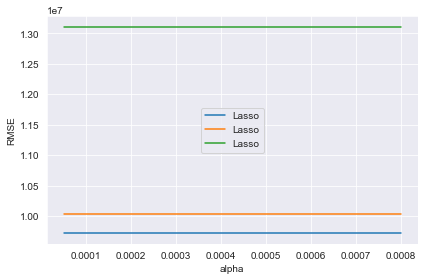

/Users/b.sanjeev/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/b.sanjeev/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/b.sanjeev/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/b.sanjeev/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it exp

/Users/b.sanjeev/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/b.sanjeev/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/b.sanjeev/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/b.sanjeev/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it exp

3238.3057138289532

In [27]:
# # Lasso Regression

# In[125]:


alphas = [0.00005, 0.0001, 0.0003, 0.0005, 0.0007, 
          0.0009, 0.01]
alphas2 = [0.00005, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
           0.0006, 0.0007, 0.0008]


lasso_model2 = make_pipeline(RobustScaler(),
                             LassoCV(max_iter=1e7,
                                    alphas = alphas2,
                                    random_state = 42)).fit(X_train, y_train)


# In[126]:


scores = lasso_model2.steps[1][1].mse_path_

plt.plot(alphas2, scores, label='Lasso')
plt.legend(loc='center')
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.tight_layout()
plt.show()


# In[46]:


cv_rmse(lasso_model2).mean()

In [28]:
# # XGBoost 

# In[129]:


from sklearn.model_selection import GridSearchCV
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4
get_ipython().run_line_magic('matplotlib', 'inline')
import xgboost as xgb
from xgboost import XGBRegressor


# In[130]:


def modelfit(alg, dtrain, target, useTrainCV=True, 
             cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain.values, 
                              label=y.values)
        
        print("\nGetting Cross-validation result..")
        cvresult = xgb.cv(xgb_param, xgtrain, 
                          num_boost_round=alg.get_params()['n_estimators'], 
                          nfold=cv_folds,metrics='rmse', 
                          early_stopping_rounds=early_stopping_rounds,
                          verbose_eval = True)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    print("\nFitting algorithm to data...")
    alg.fit(dtrain, target, eval_metric='rmse')
        
    #Predict training set:
    

In [29]:
# # STACKING

# In[193]:


from mlxtend.regressor import StackingCVRegressor
from sklearn.pipeline import make_pipeline

#setup models


lasso = make_pipeline(RobustScaler(),
                      LassoCV(max_iter=1e7, alphas = alphas2,
                              random_state = 42, cv=kfolds))





xgboost = make_pipeline(RobustScaler(),
                        XGBRegressor(learning_rate =0.1, n_estimators=200, max_depth=10,
                     min_child_weight=5 ,gamma=0, subsample=0.7,
                     colsample_bytree=0.8,objective= 'reg:squarederror',
                     nthread=4,scale_pos_weight=1,seed=27, reg_alpha=0.00006))
 

#stack
stack_gen = StackingCVRegressor(regressors=( lasso,  
                                            xgboost), 
                               meta_regressor=xgboost,
                               use_features_in_secondary=True)



In [30]:
#prepare dataframes
stackX = np.array(X_train)
stacky = np.array(y_train)


# In[194]:


stack_gen_model = stack_gen.fit(stackX, stacky)


# In[195]:

In [31]:

lasso_preds = lasso_model2.predict(X_test)

stack_gen_preds = stack_gen_model.predict(X_test)





# In[196]:

In [32]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = np.sqrt(mean_squared_error(y_test, stack_gen_preds))
print("RMSE: %f" % (rmse))


# In[78]:


df_test_xgb = df_test[['Additional_Info', 'Airline', 'Destination', 'Source', 'Date', 'Month',
       'Year', 'Stop', 'Arrival_Hour', 'Arrival_Minute', 'Dep_Hour',
       'Dep_Minute', 'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5']]
preds_1 = stack_gen_model.predict(df_test_xgb)
df_test_xgb['Price'] = preds_1
df_test_xgb.to_excel('flight_price6956.xlsx')


# In[167]:




# In[ ]:

RMSE: 1378.195534
